### Abstract

This project focuses on analyzing customer churn in the airline industry by leveraging machine learning models to predict churn based on customer and flight attributes. The dataset contains diverse features such as demographic details, flight experience, travel behavior, and customer feedback. After preprocessing the data by handling missing values, encoding categorical variables, and scaling numerical features, three machine learning models were trained and evaluated: **Random Forest**, **Logistic Regression**, and **Gradient Boosting**.

Performance metrics such as **accuracy**, **precision**, **recall**, and **F1-score** were compared across models, and ROC-AUC curves were analyzed to assess their discriminatory power. Feature importance analysis revealed the most critical factors influencing customer churn, including loyalty, type of travel, and delays. Gradient Boosting achieved the best overall performance, highlighting its suitability for the dataset.

This project provides actionable insights into customer retention strategies for airlines, emphasizing the importance of minimizing delays and tailoring loyalty programs to high-risk customers. By combining predictive analytics with interpretability, the study demonstrates the potential of data-driven decision-making to address real-world challenges in the airline industry.

### Dataset Description

The dataset used in this project is a rich collection of airline customer data, comprising **10,282 rows** and **32 columns**. It includes various features capturing customer demographics (e.g., age, gender), travel preferences (e.g., type of travel, loyalty programs), and flight details (e.g., origin and destination, flight distance, delays). Additionally, the dataset provides customer feedback through a `Likelihood to Recommend` score, which serves as the basis for defining churn. Key numerical variables include `Age`, `Flights Per Year`, and `Departure/Arrival Delays`, while categorical features encompass `Airline Status`, `Type of Travel`, and `Class`. 

The dataset also includes operational details like `Flight Cancelled` status and customer spending at the airport, offering a comprehensive view of the customer journey. Missing values in certain columns (e.g., delay times) were handled through imputation. The dataset is suitable for predictive analytics, providing a balanced mix of numerical and categorical variables to uncover patterns driving customer churn.

### **Objective of the Project**

The primary objective of this project is to analyze customer churn in the airline industry and predict which customers are at risk of leaving or disengaging with the airline. By leveraging machine learning techniques, we aim to identify the key factors influencing churn and provide actionable insights to enhance customer retention strategies. 

### **Key Questions Addressed:**
1. **Who is most likely to churn?**
   - Are customers with specific demographics or travel behaviors more prone to churn?
   
2. **What factors drive customer churn?**
   - How do delays, travel class, loyalty programs, or spending habits impact churn likelihood?

3. **How can churn be predicted accurately?**
   - Which machine learning model (Random Forest, Logistic Regression, Gradient Boosting) provides the best performance for churn prediction?

4. **What actionable insights can be derived?**
   - How can airlines improve customer retention through targeted interventions based on the model’s outputs?

Through this project, we aim to not only predict churn but also uncover deeper insights into customer behavior, enabling airlines to make data-driven decisions to retain high-value customers and improve operational efficiency.

### Importing the Required Libraries

In [1]:
import pandas as pd
from scipy.stats import mstats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Loading the Dataset

In [3]:
# Load the JSON file directly into a Pandas DataFrame
file_path = "airlinedata.json"  # Use the correct path where the file is located
data = pd.read_json(file_path)

# Display the first few rows of the data
print("Data Preview:")
display(data.head())

Data Preview:


,Destination.City,Origin.City,Airline.Status,Age,Gender,Price.Sensitivity,Year.of.First.Flight,Flights.Per.Year,Loyalty,Type.of.Travel,...,Arrival.Delay.in.Minutes,Flight.cancelled,Flight.time.in.minutes,Flight.Distance,Likelihood.to.recommend,olong,olat,dlong,dlat,freeText
0,"Philadelphia, PA","Boston, MA",Blue,21,Male,1,2004,26,-0.6774,Mileage tickets,...,0.0,No,79.0,280,9,-71.1407,42.3731,-75.2984,39.9733,NaN
1,"Los Angeles, CA","San Francisco, CA",Blue,62,Male,1,2010,39,-0.5918,Business travel,...,0.0,No,52.0,337,7,-122.1585,37.6712,-118.1043,33.9827,NaN
2,"Denver, CO","Sioux Falls, SD",Silver,33,Female,2,2003,17,-0.3600,Business travel,...,26.0,No,89.0,483,6,-96.7356,43.5335,-104.9551,39.7108,NaN
3,"Denver, CO","Spokane, WA",Silver,38,Female,1,2003,6,0.5862,Mileage tickets,...,0.0,No,111.0,836,9,-117.3523,47.6804,-104.9551,39.7108,NaN
4,"Houston, TX","Washington, DC",Blue,71,Male,1,2010,42,-0.8667,Personal Travel,...,7.0,No,198.0,1208,4,-77.1897,38.8974,-95.3935,29.7843,NaN


### Undestanding the Data


In [7]:
# Update column names in the DataFrame
data.columns = [col.replace(".", "_") for col in data.columns]

In [9]:
data.head()

,Destination_City,Origin_City,Airline_Status,Age,Gender,Price_Sensitivity,Year_of_First_Flight,Flights_Per_Year,Loyalty,Type_of_Travel,...,Arrival_Delay_in_Minutes,Flight_cancelled,Flight_time_in_minutes,Flight_Distance,Likelihood_to_recommend,olong,olat,dlong,dlat,freeText
0,"Philadelphia, PA","Boston, MA",Blue,21,Male,1,2004,26,-0.6774,Mileage tickets,...,0.0,No,79.0,280,9,-71.1407,42.3731,-75.2984,39.9733,NaN
1,"Los Angeles, CA","San Francisco, CA",Blue,62,Male,1,2010,39,-0.5918,Business travel,...,0.0,No,52.0,337,7,-122.1585,37.6712,-118.1043,33.9827,NaN
2,"Denver, CO","Sioux Falls, SD",Silver,33,Female,2,2003,17,-0.3600,Business travel,...,26.0,No,89.0,483,6,-96.7356,43.5335,-104.9551,39.7108,NaN
3,"Denver, CO","Spokane, WA",Silver,38,Female,1,2003,6,0.5862,Mileage tickets,...,0.0,No,111.0,836,9,-117.3523,47.6804,-104.9551,39.7108,NaN
4,"Houston, TX","Washington, DC",Blue,71,Male,1,2010,42,-0.8667,Personal Travel,...,7.0,No,198.0,1208,4,-77.1897,38.8974,-95.3935,29.7843,NaN


In [11]:
data.shape

(10282, 32)

In [13]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10282 entries, 0 to 10281
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Destination_City                10282 non-null  object 
 1   Origin_City                     10282 non-null  object 
 2   Airline_Status                  10282 non-null  object 
 3   Age                             10282 non-null  int64  
 4   Gender                          10282 non-null  object 
 5   Price_Sensitivity               10282 non-null  int64  
 6   Year_of_First_Flight            10282 non-null  int64  
 7   Flights_Per_Year                10282 non-null  int64  
 8   Loyalty                         10282 non-null  float64
 9   Type_of_Travel                  10282 non-null  object 
 10  Total_Freq_Flyer_Accts          10282 non-null  int64  
 11  Shopping_Amount_at_Airport      10282 non-null  int64  
 12  Eating_and_Drinking_at_Airport  

#### Summary Statistics of Dataset

In [15]:
data.describe()

,Age,Price_Sensitivity,Year_of_First_Flight,Flights_Per_Year,Loyalty,Total_Freq_Flyer_Accts,Shopping_Amount_at_Airport,Eating_and_Drinking_at_Airport,Day_of_Month,Scheduled_Departure_Hour,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Flight_time_in_minutes,Flight_Distance,Likelihood_to_recommend,olong,olat,dlong,dlat
count,10282.000000,10282.000000,10282.000000,10282.000000,10282.000000,10282.000000,10282.000000,10282.000000,10282.000000,10282.000000,10090.000000,10062.000000,10062.000000,10282.000000,10282.000000,10282.000000,10282.000000,10282.000000,10282.000000
mean,46.156876,1.279907,2007.229527,19.980646,-0.278224,0.901965,26.989204,67.903132,15.783505,12.981716,15.365808,15.788213,115.598390,826.808792,6.992414,-95.414268,37.052327,-95.373630,37.084185
std,17.261752,0.543097,2.993562,13.991233,0.531970,1.166650,54.225376,51.613335,8.661282,4.623586,38.656836,38.985530,74.012572,610.289501,2.349722,17.059269,5.656055,17.086154,5.788768
min,15.000000,0.000000,2003.000000,0.000000,-0.976200,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,13.000000,67.000000,1.000000,-165.392500,18.018300,-165.392500,18.018300
25%,33.000000,1.000000,2005.000000,9.000000,-0.700000,0.000000,0.000000,30.000000,8.000000,9.000000,0.000000,0.000000,61.000000,377.000000,5.000000,-111.929500,33.824100,-111.929500,33.824100
50%,45.000000,1.000000,2007.000000,17.000000,-0.440000,0.000000,0.000000,60.000000,16.000000,13.000000,0.000000,0.000000,94.000000,640.000000,7.000000,-90.143700,37.671200,-90.143700,37.671200
75%,59.000000,2.000000,2010.000000,29.000000,0.058800,2.000000,30.000000,90.000000,23.000000,17.000000,13.000000,14.000000,146.000000,1069.000000,9.000000,-81.642700,40.718400,-81.642700,41.066200
max,85.000000,4.000000,2012.000000,89.000000,1.000000,10.000000,626.000000,718.000000,31.000000,23.000000,748.000000,720.000000,405.000000,3302.000000,10.000000,-66.116200,66.893900,-66.116200,71.293700


### Basic Analysis and Summaries

In [18]:
# Counts by Origin State
origin_state_counts = data['Origin_State'].value_counts()
print("Origin State Counts:")
print(origin_state_counts)

Origin State Counts:
Origin_State
California        1271
Texas              883
Georgia            788
Illinois           779
Florida            751
New York           541
Colorado           529
Arizona            422
Nevada             378
Virginia           357
Utah               263
Michigan           245
Pennsylvania       239
Minnesota          232
Maryland           223
Washington         222
Missouri           219
North Carolina     214
Massachusetts      203
Ohio               177
Oregon             131
Louisiana          125
Wisconsin          113
Alabama             95
Indiana             87
Oklahoma            86
Alaska              68
Tennessee           67
Puerto Rico         57
New Mexico          51
Hawaii              50
Connecticut         46
Nebraska            45
South Carolina      39
Kentucky            38
Wyoming             38
Arkansas            34
Iowa                32
Montana             28
North Dakota        21
South Dakota        20
Kansas              20


In [20]:
# Gender Analysis
gender_counts = data['Gender'].value_counts()

print("Gender Counts:")
print(gender_counts)

Gender Counts:
Gender
Female    5804
Male      4478
Name: count, dtype: int64


In [22]:
# Unique Counts
unique_destinations = data['Destination_City'].nunique()
unique_origins = data['Origin_City'].nunique()
unique_partners = data['Partner_Name'].nunique()
unique_travel_types = data['Type_of_Travel'].nunique()

print(f"Unique Destinations: {unique_destinations}")
print(f"Unique Origins: {unique_origins}")
print(f"Unique Partners: {unique_partners}")
print(f"Unique Travel Types: {unique_travel_types}")


Unique Destinations: 198
Unique Origins: 198
Unique Partners: 14
Unique Travel Types: 3


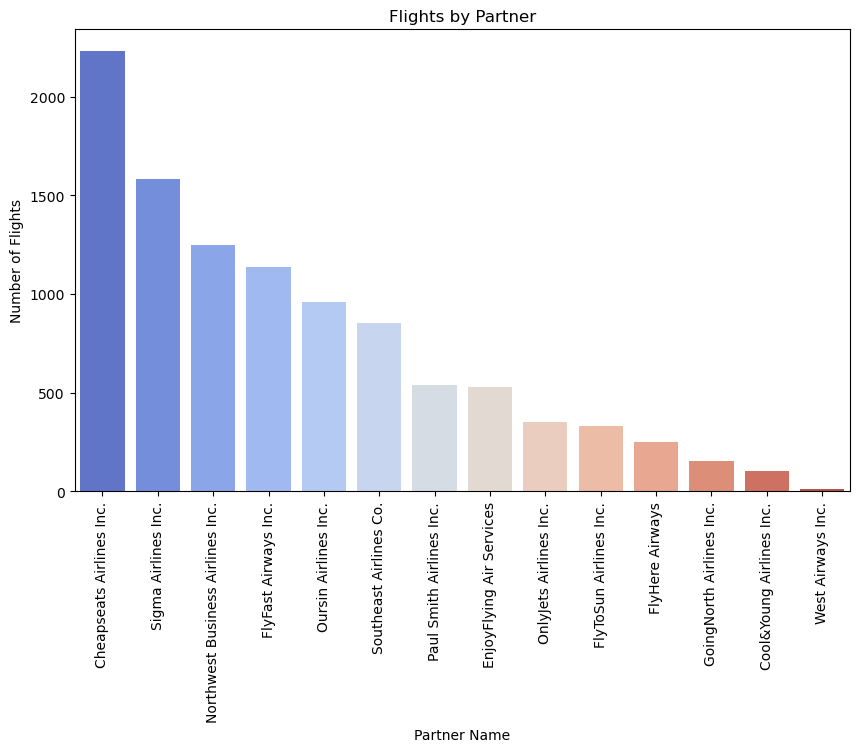

In [24]:
# Distribution of Flights by Partner
partner_counts = data['Partner_Name'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=partner_counts.index, y=partner_counts.values, palette='coolwarm')
plt.title("Flights by Partner")
plt.xlabel("Partner Name")
plt.ylabel("Number of Flights")
plt.xticks(rotation=90)
plt.show()


### Insights from the Chart

**Cheapseats Airlines Inc. Dominates**:
   - Cheapseats Airlines Inc. has the highest number of flights, indicating it is the most preferred airline partner. This dominance could be attributed to competitive pricing, widespread availability, or superior customer satisfaction.

**Sigma Airlines Inc. and Northwest Business Airlines Inc. Follow Closely**:
   - Sigma Airlines Inc. and Northwest Business Airlines Inc. are in the second and third positions, showing they are also highly popular among customers. These airlines may cater to specific customer needs, such as business travel or regional routes.

**Smaller Airlines Have Limited Market Share**:
   - Airlines like GoingNorth Airlines Inc. and Cool&Young Airlines Inc. have significantly fewer flights, indicating they struggle to attract customers compared to the top-performing airlines. This could be due to limited routes, higher costs, or a lack of differentiation.



In [26]:
# Destination City Counts
destination_city_counts = data['Destination_City'].value_counts()
# Destination State Counts
destination_state_counts = data['Destination_State'].value_counts()
# Origin City Counts
origin_city_counts = data['Origin_City'].value_counts()

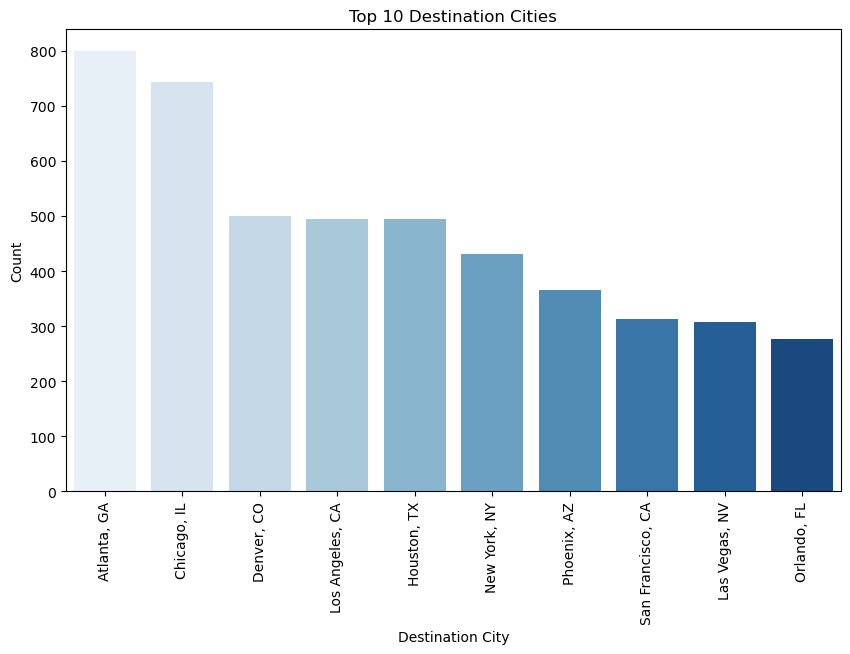

In [29]:
# Additional Visualizations
# Plot Destination City Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=destination_city_counts.index[:10], y=destination_city_counts.values[:10], palette='Blues')
plt.title("Top 10 Destination Cities")
plt.xlabel("Destination City")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()



**Atlanta, GA** and **Chicago, IL** emerge as the most popular destination cities, highlighting their significance as major travel hubs. The top 10 destinations represent a diverse mix of tourist and business hubs across different regions in the U.S., including **Los Angeles**, **New York**, and **Orlando**, indicating the airline's wide-reaching and balanced network.

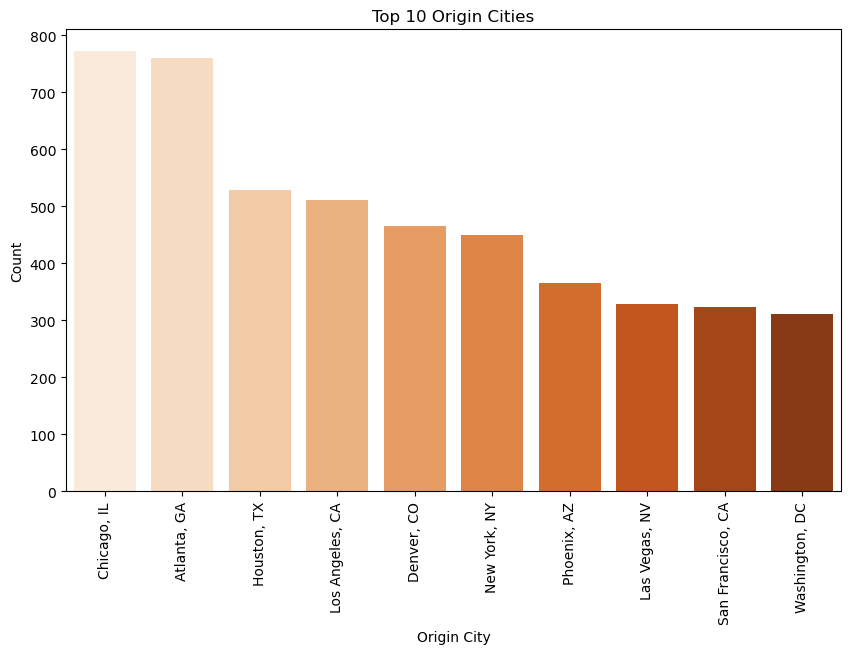

In [32]:
# Plot Origin City Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=origin_city_counts.index[:10], y=origin_city_counts.values[:10], palette='Oranges')
plt.title("Top 10 Origin Cities")
plt.xlabel("Origin City")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

**Chicago, IL** and **Atlanta, GA** are the top origin cities, reflecting their status as major departure hubs in the airline's network. The top 10 origin cities, including **Houston, TX**, **Los Angeles, CA**, and **New York, NY**, highlight a strong presence across key metropolitan and regional markets, suggesting a well-distributed origin network for diverse traveler needs.

### Average Flight Distance by Airline Status

In [35]:
flight_distance_by_status = data.groupby('Airline_Status')['Flight_Distance'].mean()
print(flight_distance_by_status)


Airline_Status
Blue        829.573389
Gold        811.786141
Platinum    801.078947
Silver      827.772555
Name: Flight_Distance, dtype: float64


Passengers with **Blue status** have the highest average flight distance (829.57 miles), indicating they likely travel on longer routes. In contrast, **Gold status** passengers have the lowest average flight distance (811.79 miles), suggesting their travel is more focused on shorter or medium-haul routes.

### Total Loyalty Points by Type of Travel

In [39]:
loyalty_by_travel_type = data.groupby('Type_of_Travel')['Loyalty'].sum()
print(loyalty_by_travel_type)


Type_of_Travel
Business travel   -1195.8295
Mileage tickets    -246.5251
Personal Travel   -1418.3415
Name: Loyalty, dtype: float64


Passengers traveling for **personal travel** exhibit the lowest total loyalty points (-1418.34), followed by **business travel** (-1195.83). In contrast, **mileage tickets** show a much smaller negative loyalty score (-246.53), indicating fewer deductions or higher accumulation within that category.

### Average Likelihood to Recommend by Class

In [41]:
recommendation_by_class = data.groupby('Class')['Likelihood_to_recommend'].mean()
print(recommendation_by_class)


Class
Business    7.333724
Eco         6.960123
Eco Plus    6.973054
Name: Likelihood_to_recommend, dtype: float64


Passengers in the **Business class** have the highest average likelihood to recommend (7.33), indicating greater satisfaction. On the other hand, **Eco** and **Eco Plus** classes have lower but comparable scores (6.96 and 6.97, respectively), reflecting a slightly less positive experience in these categories.

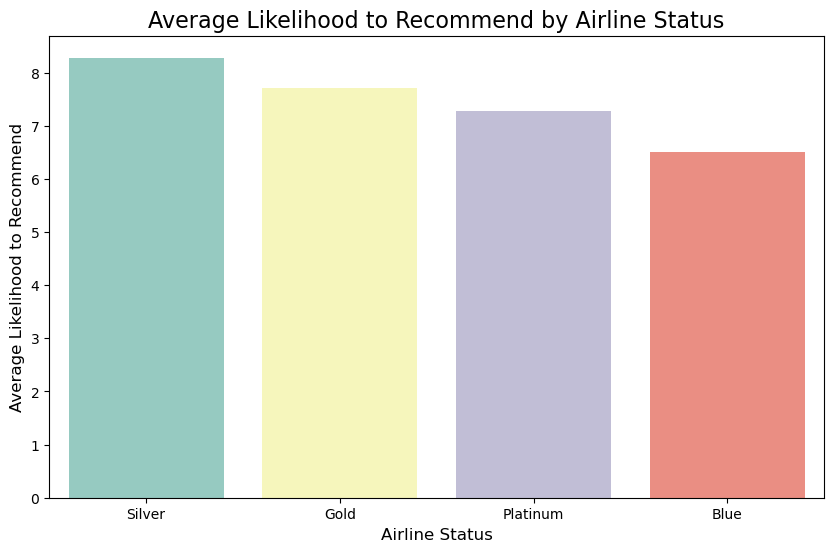

In [46]:
# Calculate average likelihood to recommend by airline status
status_likelihood = data.groupby('Airline_Status')['Likelihood_to_recommend'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=status_likelihood.index, y=status_likelihood.values, palette='Set3')
plt.title("Average Likelihood to Recommend by Airline Status", fontsize=16)
plt.xlabel("Airline Status", fontsize=12)
plt.ylabel("Average Likelihood to Recommend", fontsize=12)
plt.show()


Passengers with **Silver status** have the highest average likelihood to recommend, reflecting the greatest satisfaction among airline status tiers. In contrast, passengers with **Blue status** have the lowest likelihood to recommend, indicating lower satisfaction levels in this group.

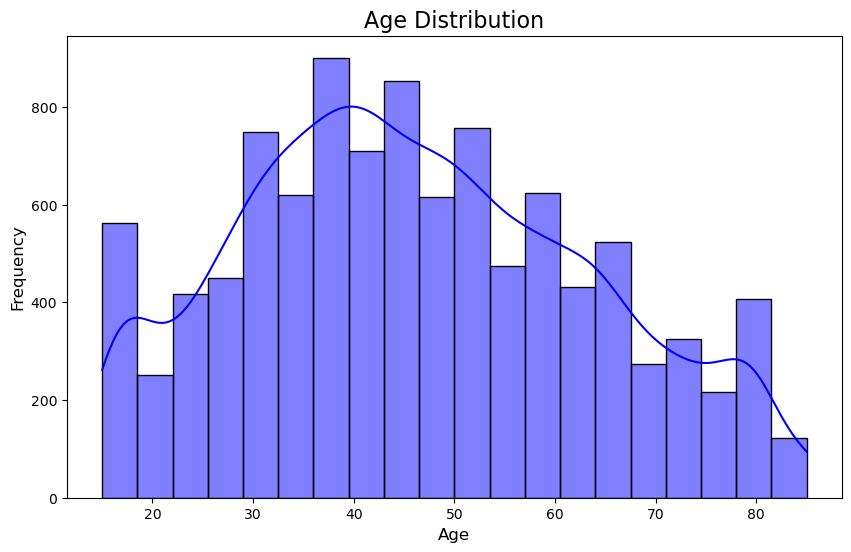

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

The age distribution shows a peak in the **30–50 age group**, indicating that most passengers belong to this demographic. There is a gradual decline in frequency for passengers above **50 years**, with relatively fewer younger passengers (below 20) and older passengers (above 70).

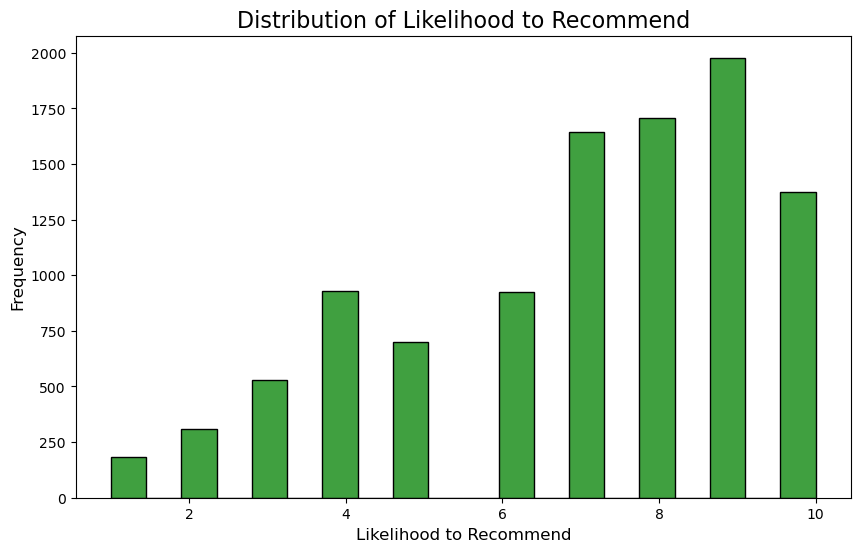

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Likelihood_to_recommend'], bins=20, kde=False, color='green')
plt.title("Distribution of Likelihood to Recommend", fontsize=16)
plt.xlabel("Likelihood to Recommend", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

The distribution of the likelihood to recommend shows that most passengers rated the airline highly, with peaks at **8** and **10**, indicating strong satisfaction. However, a noticeable proportion of passengers rated lower scores (below 6), highlighting potential dissatisfaction among certain segments.

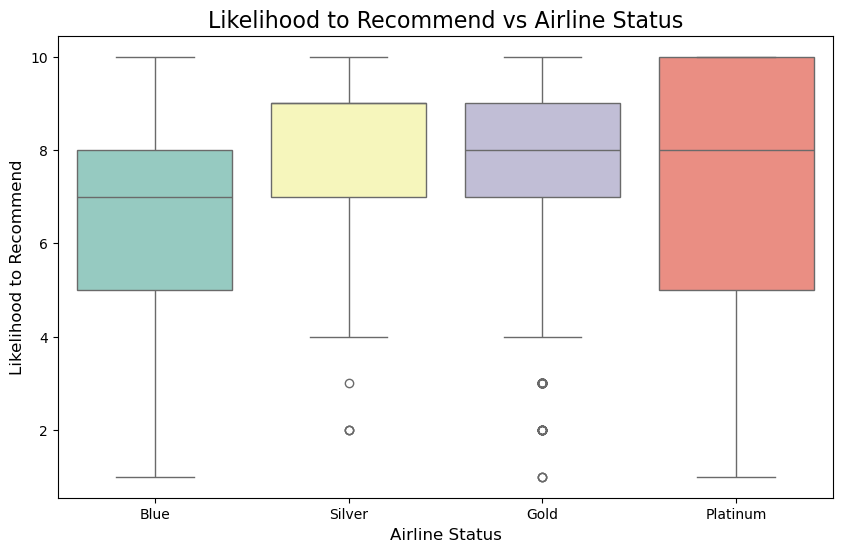

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Airline_Status', y='Likelihood_to_recommend', palette='Set3')
plt.title("Likelihood to Recommend vs Airline Status", fontsize=16)
plt.xlabel("Airline Status", fontsize=12)
plt.ylabel("Likelihood to Recommend", fontsize=12)
plt.show()

Passengers with **Platinum status** show the highest median likelihood to recommend, indicating the greatest satisfaction among airline status tiers. In contrast, **Blue status** passengers exhibit a lower median likelihood to recommend, suggesting relatively lower satisfaction levels. Additionally, there is noticeable variability in the scores across all status levels.

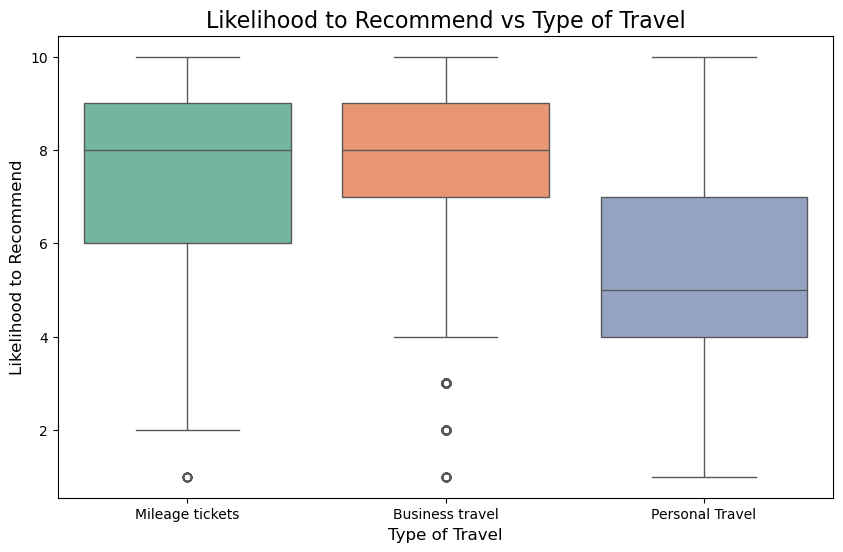

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Type_of_Travel', y='Likelihood_to_recommend', palette='Set2')
plt.title("Likelihood to Recommend vs Type of Travel", fontsize=16)
plt.xlabel("Type of Travel", fontsize=12)
plt.ylabel("Likelihood to Recommend", fontsize=12)
plt.show()

Passengers traveling with **mileage tickets** and for **business travel** have higher median likelihoods to recommend the airline, indicating greater satisfaction in these categories. In contrast, **personal travel** shows a noticeably lower median likelihood to recommend, suggesting relatively less favorable experiences among leisure travelers.

### Handling the Missing Values

In [ ]:
data.fillna({
    'Departure_Delay_in_Minutes': data['Departure_Delay_in_Minutes'].median(),
    'Arrival_Delay_in_Minutes': data['Arrival_Delay_in_Minutes'].median(),
    'Flight_time_in_minutes': data['Flight_time_in_minutes'].median()
}, inplace=True)

### Feature Importance

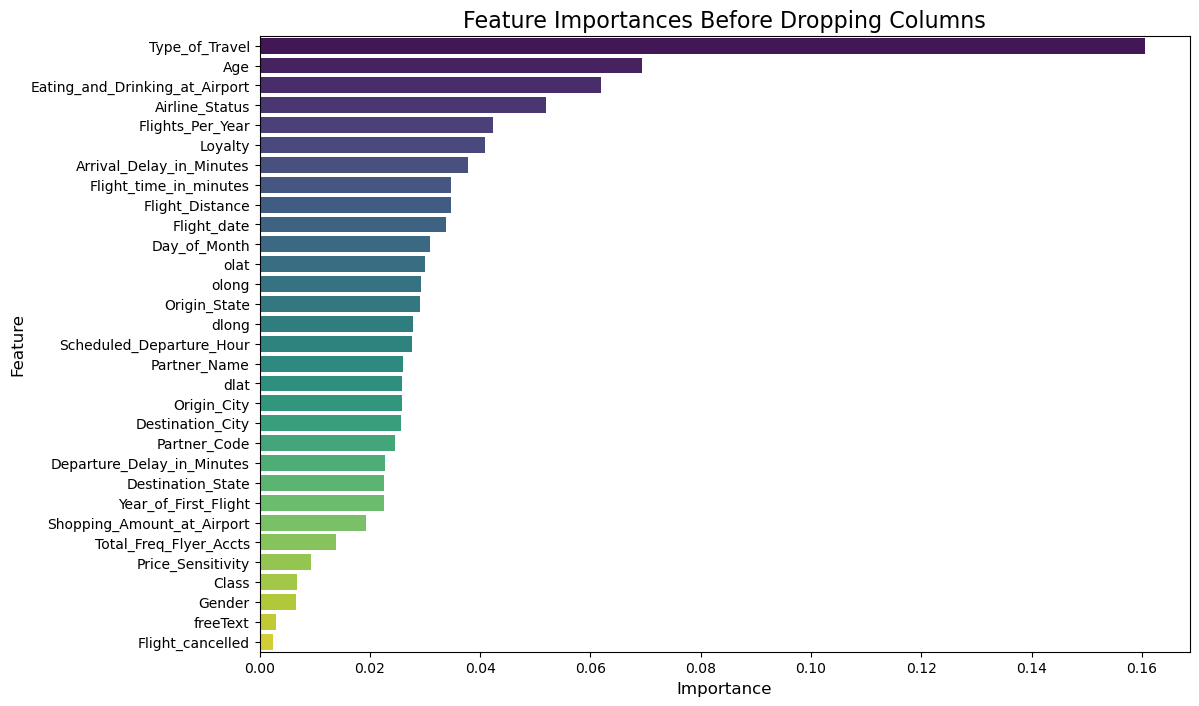

Low importance features to consider dropping: ['Price_Sensitivity', 'Class', 'Gender', 'freeText', 'Flight_cancelled']


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Extract feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importances Before Dropping Columns", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

# Identify low-importance features (threshold = 0.01, adjustable)
low_importance_features = importance_df[importance_df['Importance'] < 0.01]['Feature']
print(f"Low importance features to consider dropping: {list(low_importance_features)}")


In [ ]:
# Dropping low-importance features
low_importance_threshold = 0.01
low_importance_features = importance_df[importance_df['Importance'] < low_importance_threshold]['Feature']
X_reduced = X.drop(columns=low_importance_features)

print(f"Dropped features: {list(low_importance_features)}")
print(f"Remaining features: {list(X_reduced.columns)}")


In [68]:
# Convert categorical variables into dummy variables
data = pd.get_dummies(data, drop_first=True)

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve



### Feature Engineering

In [72]:
# STEP 3: Feature Engineering
# Define churn as a binary target variable
data['Churn'] = (data['Likelihood_to_recommend'] <= 6).astype(int)
data.drop(columns=['Likelihood_to_recommend'], inplace=True)



### Splitting the data in Training and Testing Sets

In [74]:
# STEP 4: Data Splitting
X = data.drop(columns=['Churn'])
y = data['Churn']

# Train-test split
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Scaling the traning and testing datasets

In [89]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Data Modeling

#### Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
rf_preds = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      2013
           1       0.80      0.62      0.70      1072

    accuracy                           0.81      3085
   macro avg       0.81      0.77      0.78      3085
weighted avg       0.81      0.81      0.81      3085

Accuracy: 0.813290113452188


The Random Forest model achieves an **overall accuracy of 81.3%**, with a strong **precision (82%) and recall (92%)** for the non-churn class (label 0). However, the churn class (label 1) has lower recall (62%), indicating the model struggles to correctly identify some churn cases, which may require further optimization.

#### ROC-AUC Curve for Random Forest

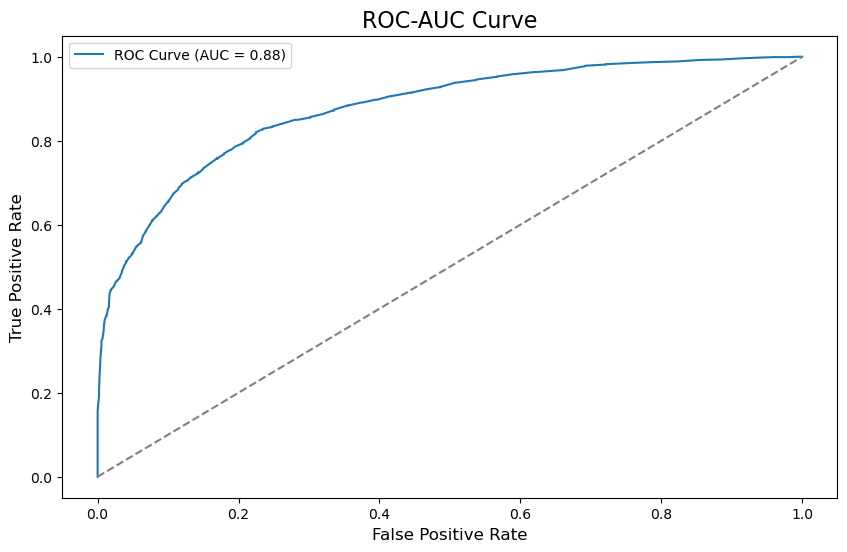

In [96]:
# ROC-AUC Curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title("ROC-AUC Curve", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend()
plt.show()

The ROC-AUC curve demonstrates that the model achieves a strong **AUC score of 0.88**, indicating good discriminatory power between churn and non-churn customers. The curve's proximity to the top-left corner reflects the model's ability to balance true positive and false positive rates effectively.

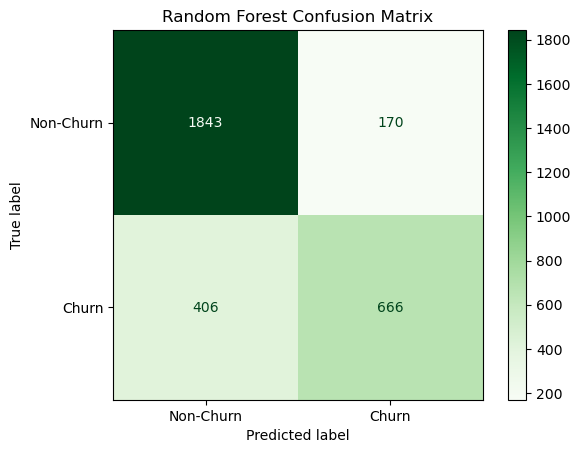

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
rf_cm = confusion_matrix(y_test, rf_preds)
ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=["Non-Churn", "Churn"]).plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()


The confusion matrix shows that the model correctly predicted **1,843 non-churn cases** and **666 churn cases**, indicating strong performance for the majority class. However, it misclassified **406 churn cases as non-churn**, highlighting a potential area for improvement in identifying churners accurately.

#### Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=10000)
log_reg.fit(X_train, y_train)

# Evaluate Logistic Regression
log_preds = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_preds))
print("Accuracy:", accuracy_score(y_test, log_preds))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      2013
           1       0.73      0.59      0.65      1072

    accuracy                           0.78      3085
   macro avg       0.76      0.74      0.74      3085
weighted avg       0.78      0.78      0.77      3085

Accuracy: 0.780551053484603


The Logistic Regression model achieves an **overall accuracy of 78.05%**, with strong performance for the non-churn class (precision: **80%**, recall: **88%**, F1-score: **84%**). However, it struggles with the churn class, achieving a lower recall of **59%**, indicating difficulty in identifying all churn cases. This highlights the need for optimization or alternative models to improve churn detection.

#### ROC-AUC Curve

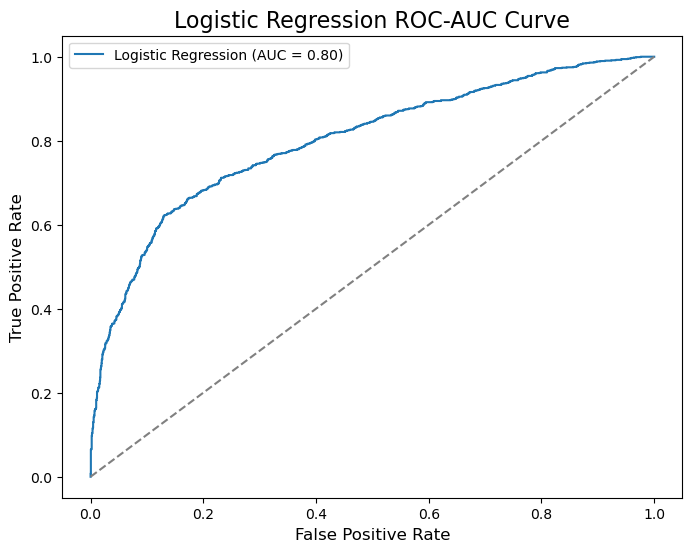

In [113]:
# Logistic Regression ROC-AUC
log_proba = log_reg.predict_proba(X_test)[:, 1]
log_fpr, log_tpr, log_thresholds = roc_curve(y_test, log_proba)
log_auc = roc_auc_score(y_test, log_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {log_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title("Logistic Regression ROC-AUC Curve", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend()
plt.show()

The ROC-AUC curve for Logistic Regression demonstrates an **AUC score of 0.80**, indicating decent discriminatory power between churn and non-churn classes. While the model performs moderately well, there is room for improvement in distinguishing true positives from false positives.

#### Plotting Confusion Matrix

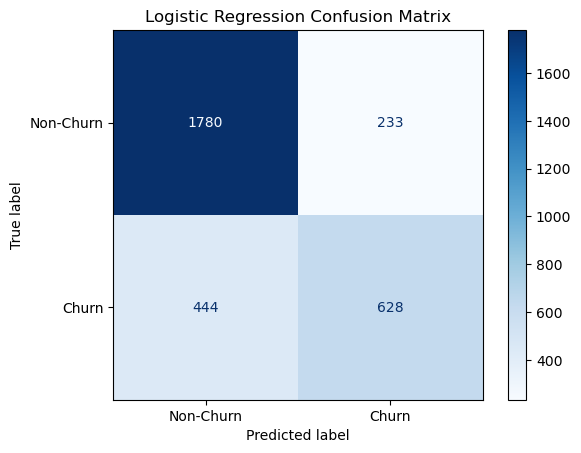

In [119]:
log_cm = confusion_matrix(y_test, log_preds)
ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=["Non-Churn", "Churn"]).plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

The confusion matrix for Logistic Regression reveals that the model correctly predicted **1,780 non-churn cases** and **628 churn cases**, showcasing reasonable performance for both classes. However, it misclassified **444 churn cases as non-churn**, which suggests potential improvements in recall for the churn class to better capture these critical instances.

#### Gradient Boosting Classifier 

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)

# Evaluate Gradient Boosting
gb_preds = gb_model.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_preds))
print("Accuracy:", accuracy_score(y_test, gb_preds))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      2013
           1       0.78      0.63      0.69      1072

    accuracy                           0.81      3085
   macro avg       0.80      0.77      0.78      3085
weighted avg       0.81      0.81      0.80      3085

Accuracy: 0.8087520259319287


The Gradient Boosting model achieves an **accuracy of 80.88%**, with strong performance for the non-churn class (precision: **82%**, recall: **91%**, F1-score: **86%**). The churn class shows improved metrics compared to Logistic Regression, with a recall of **63%** and an F1-score of **70%**, indicating better identification of churn cases while maintaining overall model balance.

#### ROC-AUC Curve for Gradient Boosting Classifer

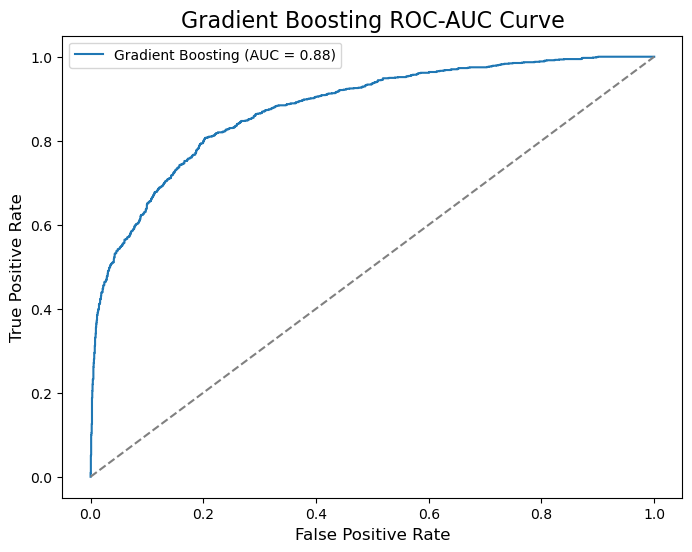

In [128]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Gradient Boosting ROC-AUC
gb_proba = gb_model.predict_proba(X_test)[:, 1]
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, gb_proba)
gb_auc = roc_auc_score(y_test, gb_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title("Gradient Boosting ROC-AUC Curve", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend()
plt.show()


The ROC-AUC curve for the Gradient Boosting model demonstrates a strong **AUC score of 0.88**, reflecting excellent discriminatory power between churn and non-churn classes. The curve's closeness to the top-left corner indicates the model effectively balances true positive and false positive rates.

#### Plotting Confusion Matrix for Gradient Boosting Classifier

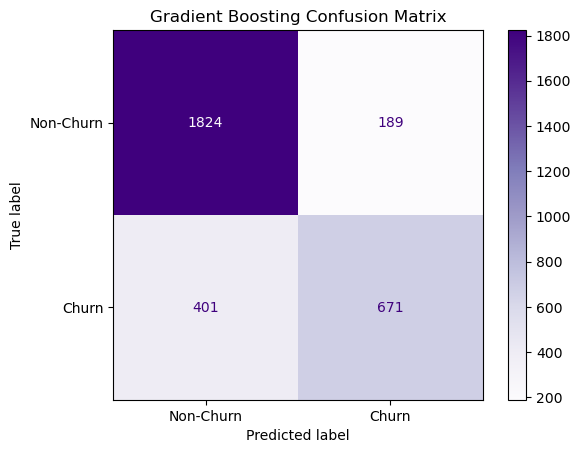

In [132]:
gb_cm = confusion_matrix(y_test, gb_preds)
ConfusionMatrixDisplay(confusion_matrix=gb_cm, display_labels=["Non-Churn", "Churn"]).plot(cmap="Purples")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

The confusion matrix for the Gradient Boosting model shows that it correctly predicted **1,824 non-churn cases** and **671 churn cases**, indicating strong performance in both classes. However, it misclassified **401 churn cases as non-churn**, suggesting some room for improvement in identifying churners more accurately.

### Comparing the Models

In [137]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Initialize a dictionary to store metrics
metrics = {
    'Model': ['Random Forest', 'Logistic Regression', 'Gradient Boosting'],
    'Accuracy': [
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, log_preds),
        accuracy_score(y_test, gb_preds)
    ],
    'Precision': [
        precision_score(y_test, rf_preds),
        precision_score(y_test, log_preds),
        precision_score(y_test, gb_preds)
    ],
    'Recall': [
        recall_score(y_test, rf_preds),
        recall_score(y_test, log_preds),
        recall_score(y_test, gb_preds)
    ],
    'F1 Score': [
        f1_score(y_test, rf_preds),
        f1_score(y_test, log_preds),
        f1_score(y_test, gb_preds)
    ]
}

# Create a DataFrame
import pandas as pd
metrics_df = pd.DataFrame(metrics)
metrics_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.813290,0.796651,0.621269,0.698113
1,Logistic Regression,0.780551,0.729384,0.585821,0.649767
2,Gradient Boosting,0.808752,0.780233,0.625933,0.694617


The comparison table shows that **Random Forest** outperforms the other models with the highest **accuracy (81.32%)**, **precision (79.66%)**, and **F1-score (69.81%)**, making it the most balanced model. **Gradient Boosting** follows closely with comparable metrics, showing slightly better recall (**62.59%**) for identifying churn cases. **Logistic Regression** performs the weakest, highlighting its limitations in capturing the complexity of the dataset.

### Insights from the Comparison Table:

1. **Random Forest as the Best Performer**:
   - Random Forest achieves the highest **accuracy (81.32%)**, **precision (79.66%)**, and **F1-score (69.81%)**, indicating that it provides the most balanced performance across all metrics.

2. **Gradient Boosting's Strength in Recall**:
   - Gradient Boosting has the highest **recall (62.59%)**, suggesting it is slightly better at identifying churn cases compared to Random Forest. This makes it a suitable choice if capturing churn cases is the priority.

3. **Logistic Regression Limitations**:
   - Logistic Regression exhibits the weakest performance, particularly in recall (**58.58%**) and F1-score (**64.97%**), reflecting its difficulty in handling the dataset's complexity.

4. **Trade-Off Between Metrics**:
   - While Random Forest has strong overall performance, Gradient Boosting might be preferred in scenarios where maximizing recall (e.g., identifying churn cases) is more critical than overall accuracy.

### Key Actionable Insights:
- Random Forest can be used as the primary model for a well-rounded approach.
- Gradient Boosting can be deployed if the focus is on minimizing false negatives (i.e., correctly identifying churn cases).
- Logistic Regression may require further feature engineering or hyperparameter tuning to improve its performance.

### Comparing the ROC-AUC Curve across the Models

C:\Users\anujs\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


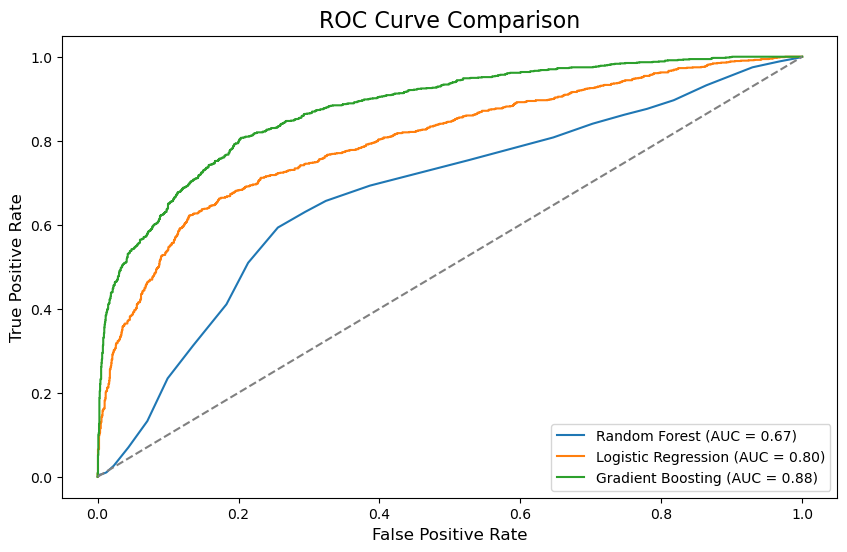

In [145]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Random Forest ROC
rf_proba = rf_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
rf_auc = roc_auc_score(y_test, rf_proba)

# Logistic Regression ROC
log_proba = log_reg.predict_proba(X_test)[:, 1]
log_fpr, log_tpr, _ = roc_curve(y_test, log_proba)
log_auc = roc_auc_score(y_test, log_proba)

# Gradient Boosting ROC
gb_proba = gb_model.predict_proba(X_test)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_proba)
gb_auc = roc_auc_score(y_test, gb_proba)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {log_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title("ROC Curve Comparison", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend()
plt.show()


### Key Takeways from the ROC Curve Comparison:

1. **Gradient Boosting's Superiority**:
   - Gradient Boosting achieves the highest AUC score (**0.88**), demonstrating its strong ability to distinguish between churn and non-churn customers. This makes it the most reliable model for accurate predictions in this scenario.

2. **Logistic Regression's Competency**:
   - Logistic Regression performs reasonably well with an AUC of **0.80**, showing that it can effectively balance true positives and false positives, though it is less precise than Gradient Boosting.

3. **Random Forest's Limitations**:
   - Random Forest's AUC of **0.67** indicates a weaker performance compared to the other models, suggesting that it struggles to discriminate effectively in this context, potentially due to overfitting or insufficient parameter tuning.

### Insights Gained:
- The chart highlights the importance of selecting models with higher AUC scores to ensure reliable churn predictions.
- Gradient Boosting should be prioritized for deployment due to its superior overall performance.
- Logistic Regression, while less effective, can serve as a simpler and interpretable alternative for less critical use cases.
- Random Forest requires further tuning or may not be suitable for this specific dataset.

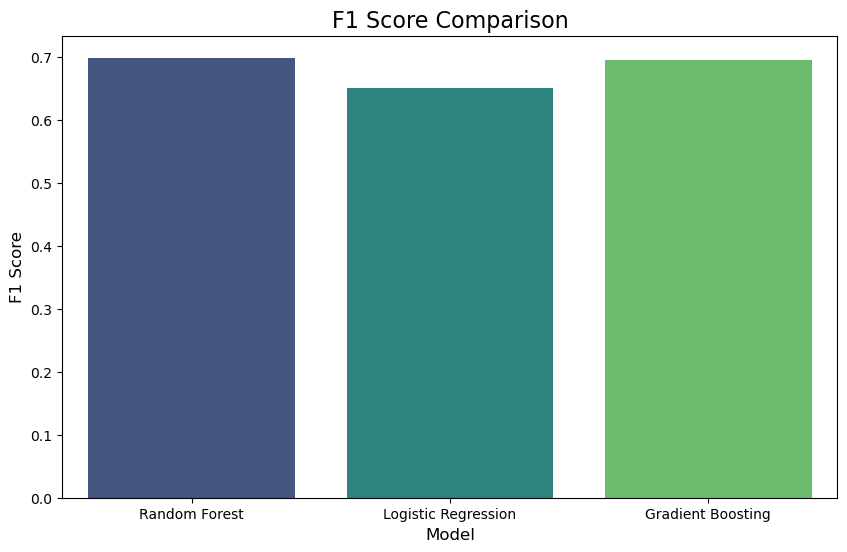

In [150]:
# Plot F1 Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df, x='Model', y='F1 Score', palette='viridis')
plt.title("F1 Score Comparison", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("F1 Score", fontsize=12)
plt.show()


### Insights from the F1 Score Comparison Chart:

1. **Random Forest Leads Slightly**:
   - The Random Forest model achieves the highest **F1 Score**, closely followed by Gradient Boosting, indicating a good balance between precision and recall in predicting both churn and non-churn cases.

2. **Gradient Boosting Shows Competitiveness**:
   - Gradient Boosting's F1 Score is almost equal to Random Forest's, highlighting its robustness and reliability, particularly in identifying churn cases effectively.

3. **Logistic Regression Lags Behind**:
   - Logistic Regression exhibits the lowest F1 Score among the three models, suggesting its relative inefficiency in balancing precision and recall for this dataset.

### Key Takeaways:
- Random Forest is marginally better for scenarios requiring balanced precision and recall.
- Gradient Boosting offers comparable performance and may be preferred for more complex or nuanced predictions.
- Logistic Regression, while simpler, may require further tuning or feature engineering to match the performance of ensemble models.

### **Future Scope**
1. **Improving Model Performance**:
   - Future work could involve hyperparameter tuning, ensemble techniques, or exploring advanced algorithms such as XGBoost or deep learning models to further improve predictive accuracy and recall for churn cases.
   
2. **Feature Engineering**:
   - Additional derived features, such as customer lifetime value or sentiment analysis from customer reviews, could enhance model performance and insights.

3. **Real-Time Prediction**:
   - Implementing the model in a real-time environment to monitor customer churn dynamically and take proactive measures to retain at-risk customers.

4. **Broader Applications**:
   - Expanding the model to include more customer segments or integrating it with other business areas, such as marketing or loyalty program optimization.

### **Limitations**
1. **Imbalanced Dataset**:
   - The dataset may have an inherent imbalance between churn and non-churn classes, impacting the model's ability to correctly classify churn cases.

2. **Feature Availability**:
   - The model relies on specific features; if these are unavailable or inconsistently recorded in real-world applications, performance may degrade.

3. **Generalizability**:
   - The model is trained on a specific airline dataset and may not generalize well to other industries or datasets without re-training.

4. **Interpretability**:
   - Ensemble models like Random Forest and Gradient Boosting, while accurate, lack the interpretability of simpler models like Logistic Regression, which might be critical for certain stakeholders.

---


### **Overall Results**
- **Random Forest** model emerged as the best overall performer, with the highest accuracy (**81.32%**), making it suitable for balanced predictions.
- **Gradient Boosting** provided slightly lower accuracy but showed competitive recall, making it a strong contender for identifying churn cases.
- **Logistic Regression** exhibited decent performance but lagged behind ensemble models, highlighting its limitations in handling complex datasets.

The project successfully demonstrated the potential of machine learning to predict customer churn in the airline industry and identified actionable insights that could inform strategic decisions for customer retention.